In [57]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [85]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc

In [3]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"


In [81]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['Preg', 'Glu', 'Bp', 'Sft', 'Ins', 'Bmi', 'Dpf', 'Age', 'Class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("prima-indians-diabetes.csv", names= colnames)

In [82]:
pima_df.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [83]:
pima_df.corr()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Sft,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


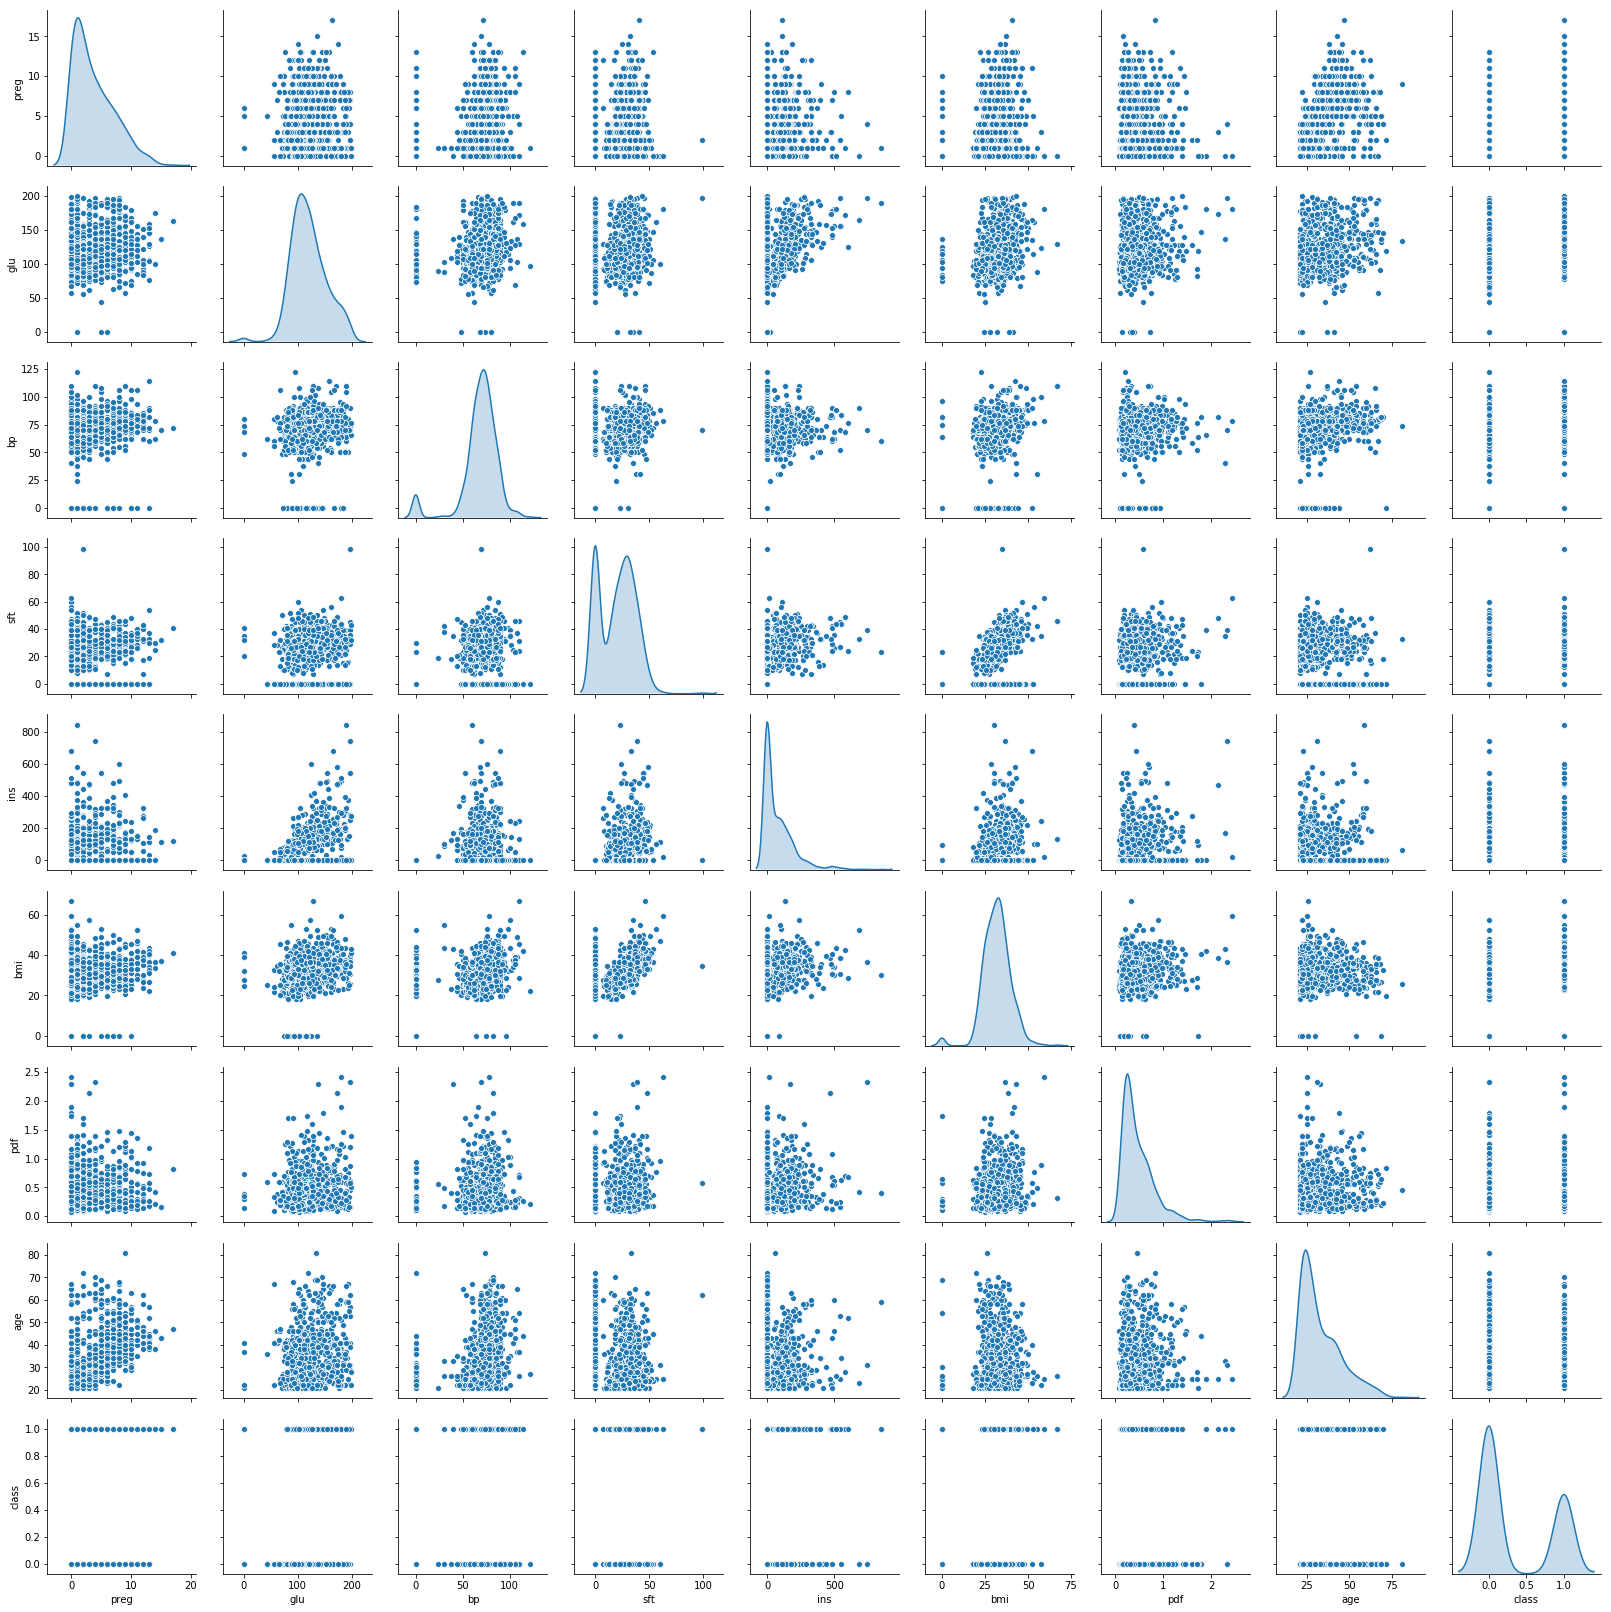

In [29]:
sns.pairplot(pima_df,diag_kind='kde')

In [76]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,glu,bp,sft,ins,bmi,pdf,age,class


In [77]:
# replace the missing values in pima_df with median value :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively
pima_df = pima_df.fillna(pima_df.median())
pima_df.columns

Index(['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'pdf', 'age', 'class'], dtype='object')

In [66]:
pima_df.head()

,preg,glu,bp,sft,ins,bmi,pdf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
#pima_df['ins']=np.log(1+pima_df['ins'])
m1=smf.ols('Class~Preg+Glu+Bp+Sft+Ins+Bmi+Dpf+Age',pima_df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           7.36e-55
Time:                        08:49:50   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8539      0.085     -9.989      0.000      -1.022      -0.686
Preg           0.0206      0.005      4.014      0.000       0.011       0.031
Glu            0.0059      0.001     11.493      0.000       0.005       0.007
Bp            -0.0023      0.001     -2.873      0.004      -0.004      -0.001
Sft            0.0002      0.001      0.139      0.890      -0.002       0.002
Ins           -0.0002      0.000     -1.205      0.229      -0.000       0.000
Bmi            0.0132      0.002      6.344      0.000       0.009       0.017
Dpf            0.1472      0.045      3.268      0.001       0.059       0.236
Age            0.0026      0.002      1.693      0.091      -0.000       0.006
==============================================================================
Omnibus:                       41.539   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.183
Skew:                           0.395   Prob(JB):                     1.69e-07
Kurtosis:                       2.408   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.000000
glu,768.0,120.894531,31.972618,0.000,99.00000,117.000000,140.250000,199.000000
bp,768.0,69.105469,19.355807,0.000,62.00000,72.000000,80.000000,122.000000
sft,768.0,20.536458,15.952218,0.000,0.00000,23.000000,32.000000,99.000000
ins,768.0,2.471968,2.460253,0.000,0.00000,3.448852,4.853976,6.741701
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.000000,36.600000,67.100000
pdf,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.420000
age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.000000
class,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.000000


In [34]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,preg,glu,bp,sft,ins,bmi,pdf,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [35]:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right


In [36]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

#pima_df_attr = pima_df.iloc[:,0:9]

#axes = pd.plotting.scatter_matrix(pima_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\pima_pairpanel.png')

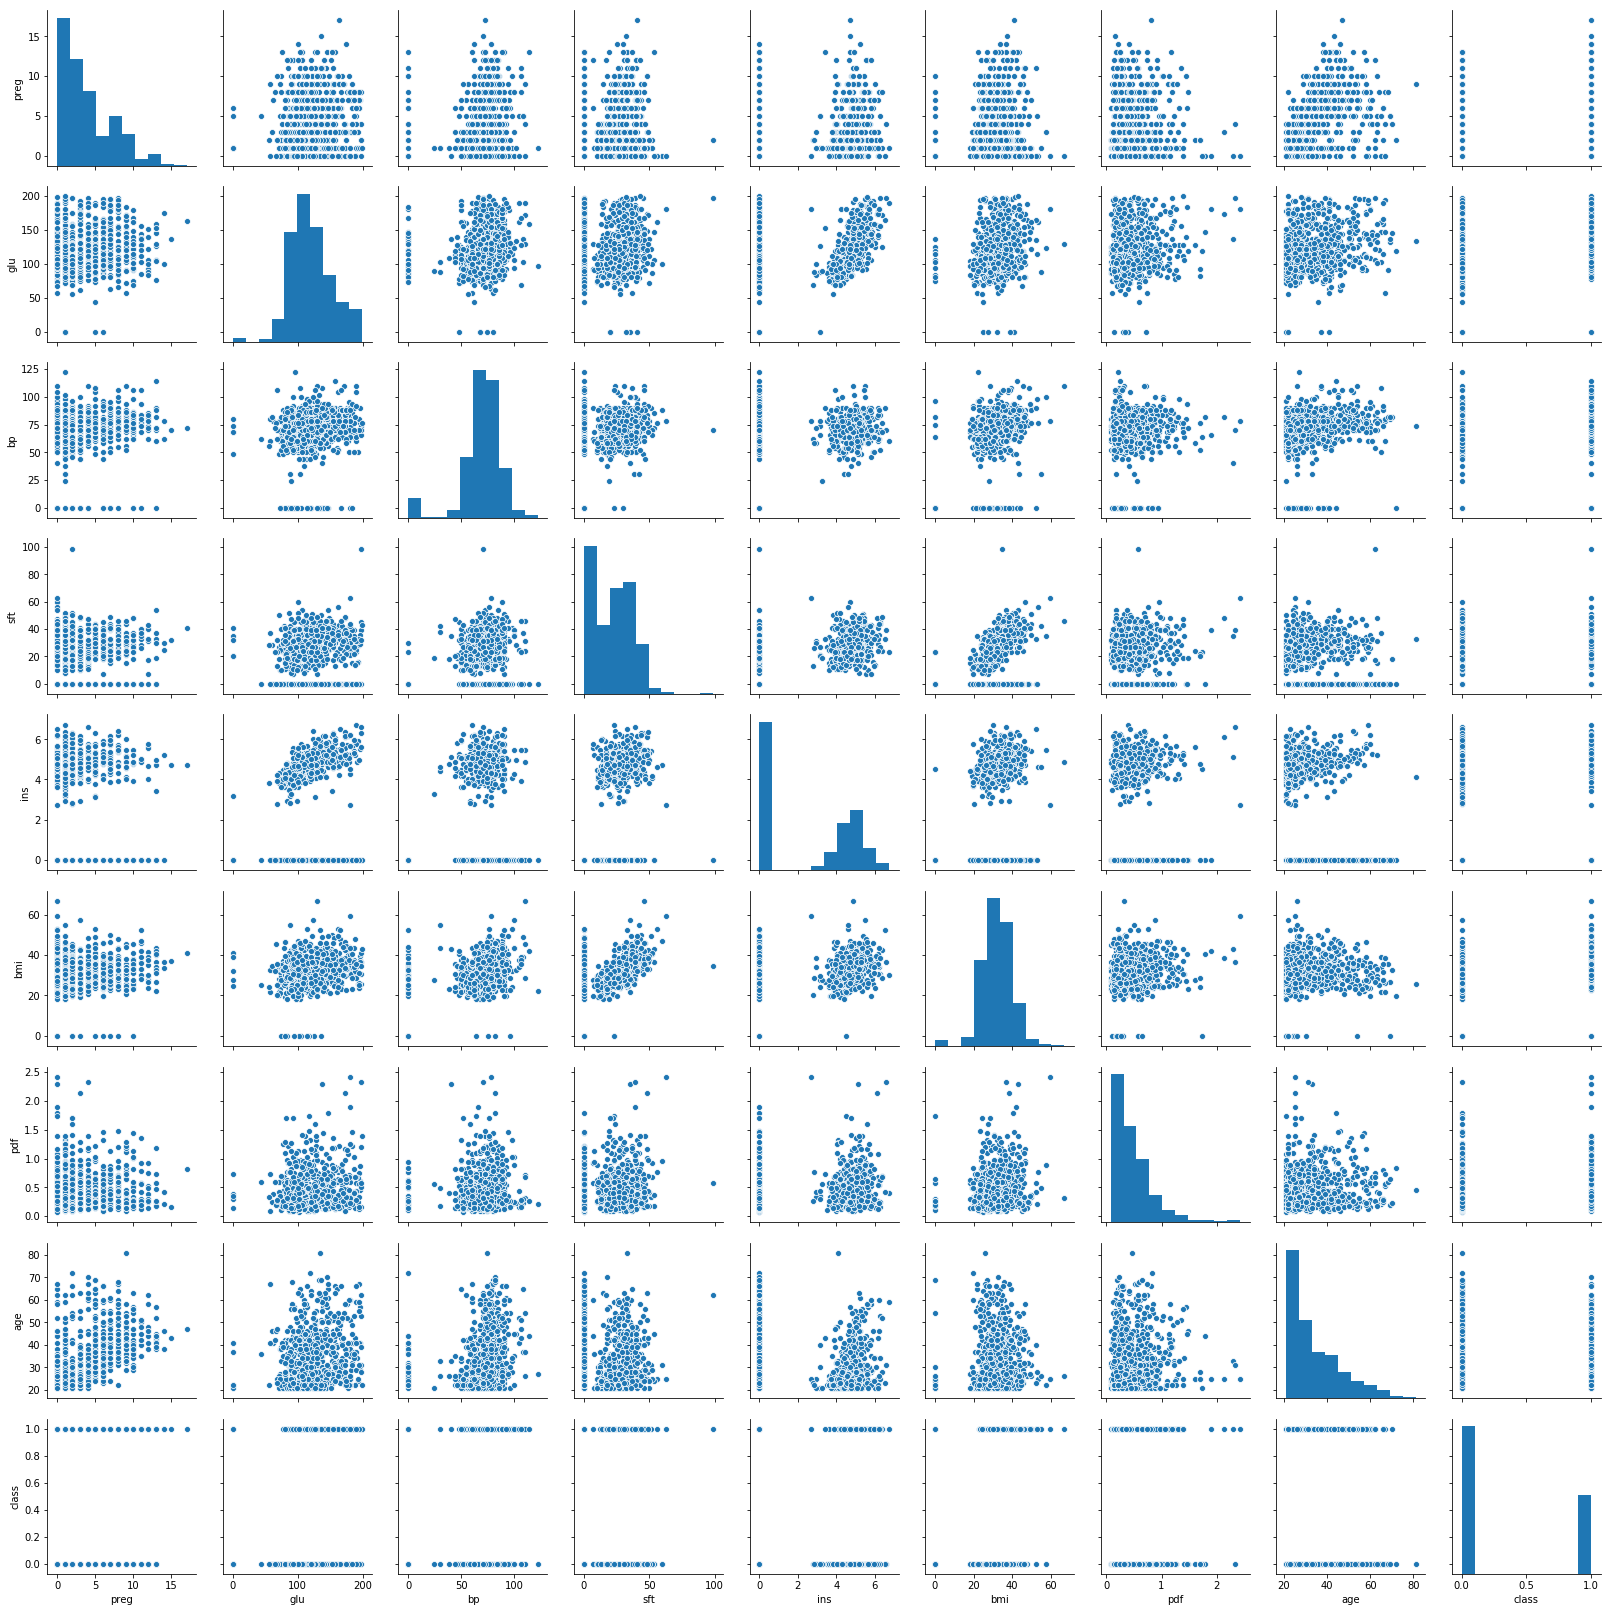

In [37]:
# Pairplot using sns

sns.pairplot(pima_df)

In [38]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [45]:
array = pima_df.values
X=pima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'pdf', 'age']]
Y=pima_df['class']
X.shape
Y.shape

(768,)

In [46]:
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
X.shape

(768, 7)

In [47]:
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
X_train.shape
pd.DataFrame(y_test)[0].value_counts()

0.0    147
1.0     84
Name: 0, dtype: int64

In [48]:
(132+46)/len(y_test)

0.7705627705627706

In [49]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
acc = metrics.accuracy_score(y_test,y_predict)
print(acc)
print(metrics.confusion_matrix(y_test,y_predict))

0.7489177489177489
[[129  18]
 [ 40  44]]


In [50]:
#Sensitivity
TPR=46/84
TPR

0.5476190476190477

In [ ]:
#Specificity
TNR=132/147
TNR

In [ ]:
46/(46+15)

In [ ]:
132/(132+38)

In [23]:
CR=metrics.classification_report(y_test,y_predict)
print(CR)

             precision    recall  f1-score   support

        0.0       0.78      0.90      0.83       147
        1.0       0.75      0.55      0.63        84

avg / total       0.77      0.77      0.76       231



In [15]:
# Improve the model -----------------------------Iteration 2 -----------------------------------------------

In [22]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries

from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [19]:
X_train[0,:]

array([ 11.   , 111.   ,  84.   ,  40.   ,   0.   ,  46.8  ,   0.925])

In [32]:
X_train[1].max()

121.0

In [24]:
46/(46+13)

0.7796610169491526

In [12]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.7792207792207793
[[134  13]
 [ 38  46]]


    Analyzing the confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 46

True Negatives (TN): we correctly predicted that they don't have diabetes 134

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 13
Falsely predict positive Type I error


False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 38
Falsely predict negative Type II error

In [86]:
fpr,tpr, _ = roc_curve(ytest, y_predict)
roc_auc = auc(fpr, tpr)

print(roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

NameError: name 'ytest' is not defined